# 공용처리

In [1]:
## Retail_dataset.xlsx
import sklearn as sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

In [2]:
import platform

def set_matplotlib_font():
    system = platform.system()

    if system == "Windows":
        plt.rc('font', family='Malgun Gothic')
    elif system == "Darwin":  # macOS
        plt.rc('font', family='AppleGothic')
    elif system == "Linux":
        plt.rc('font', family='NanumGothic')
    else:
        print("Unknown system. Please set font manually.")

    plt.rcParams['axes.unicode_minus'] = False

# 폰트 설정 함수 호출
set_matplotlib_font()

# 이후 평소대로 matplotlib 사용

In [3]:
pd.describe_option()
pd.set_option('display.max_columns',None)

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

- 컬럼 추가 우선, 컬럼 삭제는 merge 후 최종 단계에!
- 

# 데이터 불러오기

In [4]:
# retail_dataset = pd.read_excel("C:/Git/심화프로젝트/dataset/Retail_dataset.xlsx", sheet_name=None)

In [5]:
# !kaggle datasets download -d quangvinhhuynh/marketing-and-retail-analyst-e-comerce
# import shutil
# filename = 'marketing-and-retail-analyst-e-comerce.zip' # 압축 해제할 파일 이름
# extrac_dir = 'dataset' # 압축 해제할 폴더 이름
# archive_format = 'zip' # 압축 파일 형태
# shutil.unpack_archive(filename, extrac_dir, archive_format)
# import os
# # 파일들이 있는 폴더명으로 폴더내 파일 목록 확인
# os.listdir('dataset/') 
customers_df= pd.read_csv('dataset/customers.csv')
orders_df= pd.read_csv('dataset/orders.csv')
order_items_df= pd.read_csv('dataset/order_items.csv')
payments_df= pd.read_csv('dataset/payments.csv')
products_df= pd.read_csv('dataset/products.csv')

In [6]:
# order_df = retail_dataset['orders']
# order_items_df = retail_dataset['order_items']
# customers_df = retail_dataset['customers']
# payments_df = retail_dataset['payments']
# products_df = retail_dataset['products']

# 데이터 전처리

## ID 형 변환 (int -> str)

### order_items_df

In [7]:
order_items_df['order_item_id'] = order_items_df['order_item_id'].astype(str)

## product_df 결측치 처리

In [8]:
#제품 크기에 대한 정보가 없는 레코드가 2개 -> 삭제 처리
products_df= products_df[products_df['product_category_name'].notnull()]
products_df= products_df[products_df['product_length_cm'].notnull()]

## product_volume 추가

In [9]:
products_df['product_volume'] = products_df['product_length_cm'] *  products_df['product_height_cm'] *  products_df['product_width_cm'] 

# 데이터 병합 진행

In [10]:
retail_df_merged = pd.merge(orders_df, order_items_df, on='order_id', how='left')
retail_df_merged = pd.merge(retail_df_merged, payments_df, on='order_id', how='left')
retail_df_merged = pd.merge(retail_df_merged, customers_df, on='customer_id', how='right')
retail_df_merged = pd.merge(retail_df_merged, products_df, on='product_id', how='right')

In [11]:
retail_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127097 entries, 0 to 127096
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       127097 non-null  object 
 1   customer_id                    127097 non-null  object 
 2   order_status                   127097 non-null  object 
 3   order_purchase_timestamp       127097 non-null  object 
 4   order_approved_at              127081 non-null  object 
 5   order_delivered_timestamp      124354 non-null  object 
 6   order_estimated_delivery_date  127097 non-null  object 
 7   order_item_id                  127097 non-null  object 
 8   product_id                     127097 non-null  object 
 9   seller_id                      127097 non-null  object 
 10  price                          127097 non-null  float64
 11  shipping_charges               127097 non-null  float64
 12  payment_sequential            

# 불필요한 컬럼 삭제

In [12]:
# delivered 만
retail_df_merged = retail_df_merged[retail_df_merged['order_status']=='delivered']
retail_df_merged = retail_df_merged[retail_df_merged['order_delivered_timestamp'].notnull()]
retail_df_merged = retail_df_merged[retail_df_merged['order_approved_at'].notnull()]

#
retail_df_merged= retail_df_merged.drop(labels= 'customer_zip_code_prefix', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'customer_city', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'order_estimated_delivery_date', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'order_delivered_timestamp', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'product_width_cm', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'product_height_cm', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'product_length_cm', axis= 1)


## order - purchased_month

<Axes: xlabel='count', ylabel='month_purchase'>

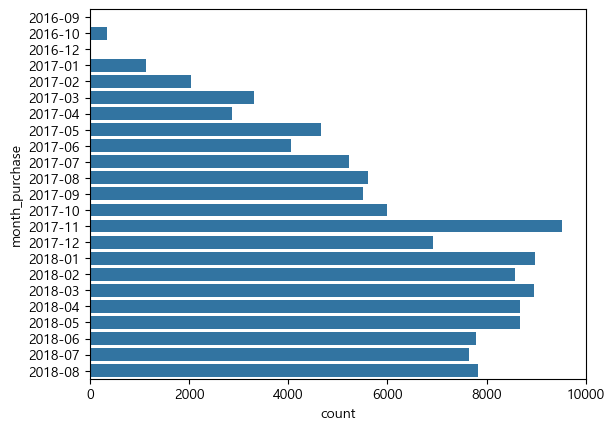

In [13]:
retail_df_merged['order_purchase_timestamp']= pd.to_datetime(retail_df_merged['order_purchase_timestamp'])
retail_df_merged['order_purchase_timestamp'].dt.strftime('%Y-%m')
retail_df_merged['month_purchase']= retail_df_merged['order_purchase_timestamp'].dt.strftime('%Y-%m')
retail_df_merged['month_purchase']= pd.to_datetime(retail_df_merged['month_purchase'])
retail_df_merged['month_purchase']= retail_df_merged['order_purchase_timestamp'].dt.to_period('M')

sns.countplot(data= retail_df_merged, y= retail_df_merged['month_purchase']
              , order= sorted(retail_df_merged['month_purchase']))
#! 실제 value를 곱해서 월별 value 컬럼 만들기.
#! delivered

## customer_state 원핫인코딩
- 1200개 이상 값만

SP 사람들만 군집화해도 됨. 룰..베이스 + 머신러닝 결합
해보고나서 성능 안좋다싶으면 줄여도 ok

In [14]:
state_counts= retail_df_merged['customer_state'].value_counts()
state_above_1200= state_counts[state_counts>1200].index
retail_df_merged= retail_df_merged[retail_df_merged['customer_state'].isin(state_above_1200)]
retail_df_merged['customer_state'].value_counts()


from sklearn.preprocessing import OneHotEncoder
oe= OneHotEncoder(sparse_output=False) # 배열형태

oe.fit(retail_df_merged[['customer_state']])

state_csr = oe.transform(retail_df_merged[['customer_state']])
state_csr_df = pd.DataFrame(state_csr, columns= oe.get_feature_names_out())
# 배열형태로 했으니 toarray() 삭제

# state_csr_df 인덱스 초기화
state_csr_df.reset_index(drop= True, inplace= True)

retail_df_merged= pd.concat([retail_df_merged.reset_index(drop= True), state_csr_df], axis= 1)
retail_df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,143d00a4f2dde4e0364ee1821577adb3,619e926d09b26efbd5180368b1ddc874,delivered,2018-08-03 08:55:00,8/3/2018 9:31,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,1.0,credit_card,2.0,121.84,SP,baby,371.0,2704.0,2018-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,ad353b4fb0e294adc4eda48af73e68a6,delivered,2018-04-11 01:06:00,4/11/2018 1:30,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,1.0,credit_card,4.0,46.19,SP,housewares,625.0,4420.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116431,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
116432,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
116433,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
116434,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## payment_type 원핫인코딩

In [15]:
retail_df_merged['payment_type'].value_counts()
# not_defined        4개 지우고 원핫인코딩
retail_df_merged['payment_type'].isna().sum()

# not_defined 제외
pay_type = retail_df_merged['payment_type'].value_counts()
defined_payment = pay_type[pay_type.index != 'not_defined'].index
retail_df_merged= retail_df_merged[retail_df_merged['payment_type'].isin(defined_payment)]
retail_df_merged['payment_type'].value_counts()

oe.fit(retail_df_merged[['payment_type']])
payment_csr = oe.transform(retail_df_merged[['payment_type']])
payment_csr_df = pd.DataFrame(payment_csr, columns= oe.get_feature_names_out())
payment_csr_df.reset_index(drop= True, inplace= True)

retail_df_merged= pd.concat([retail_df_merged.reset_index(drop= True), payment_csr_df], axis= 1)
retail_df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,143d00a4f2dde4e0364ee1821577adb3,619e926d09b26efbd5180368b1ddc874,delivered,2018-08-03 08:55:00,8/3/2018 9:31,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,1.0,credit_card,2.0,121.84,SP,baby,371.0,2704.0,2018-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,ad353b4fb0e294adc4eda48af73e68a6,delivered,2018-04-11 01:06:00,4/11/2018 1:30,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,1.0,credit_card,4.0,46.19,SP,housewares,625.0,4420.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116428,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116429,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116430,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116431,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## order_status 원핫인코딩 -- 원핫 X 삭제 order_status 딜리버드만 남겨두기.

In [16]:
# oe.fit(retail_df_merged[['order_status']])
# status_csr= oe.transform(retail_df_merged[['order_status']])
# status_csr_df = pd.DataFrame(status_csr, columns= oe.get_feature_names_out())
# status_csr_df.reset_index(drop= True, inplace= True)

# retail_df_merged= pd.concat([retail_df_merged.reset_index(drop= True), status_csr_df], axis= 1)
# retail_df_merged

#### category_name 분류하기

In [17]:
# 'category_column'이 null이 아닌 데이터만 필터링
filtered_df = retail_df_merged[retail_df_merged['product_category_name'].notna()]

In [18]:
# 각 범주에 속하는 항목 리스트를 정의
home_living = [
    'housewares', 'furniture_decor', 'small_appliances', 'bed_bath_table',
    'kitchen_dining_laundry_garden_furniture', 'home_comfort', 'furniture_living_room',
    'home_appliances', 'home_appliances_2', 'home_construction', 'home_comfort_2',
    'furniture_bedroom', 'furniture_mattress_and_upholstery', 'home_confort', 'garden_tools',
    'construction_tools_construction', 'construction_tools_safety', 'construction_tools_lights',
    'costruction_tools_garden', 'costruction_tools_tools'
]

fashion_accessories = [
    'fashion_underwear_beach', 'fashion_bags_accessories', 'fashion_shoes',
    'fashion_sport', 'fashion_male_clothing', 'fashion_childrens_clothes',
    'fashio_female_clothing', 'watches_gifts', 'luggage_accessories'
]

electronics_appliances = [
    'electronics', 'telephony', 'computers_accessories', 'computers',
    'tablets_printing_image', 'audio', 'small_appliances_home_oven_and_coffee',
    'cine_photo', 'consoles_games', 'fixed_telephony'
]

health_beauty = ['health_beauty', 'perfumery']

hobbies_leisure = [
    'sports_leisure', 'musical_instruments', 'party_supplies', 'christmas_supplies',
    'art', 'arts_and_craftmanship', 'music', 'dvds_blu_ray', 'books_general_interest',
    'books_technical', 'books_imported', 'flowers', 'la_cuisine'
]

baby_kids = ['toys', 'baby', 'diapers_and_hygiene', 'fashion_childrens_clothes']

office_industry = [
    'stationery', 'office_furniture', 'industry_commerce_and_business',
    'agro_industry_and_commerce', 'signaling_and_security', 'security_and_services'
]

food_beverage = ['food', 'drinks', 'food_drink']

miscellaneous = ['pet_shop', 'auto', 'market_place', 'cool_stuff']


In [19]:
# 각 범주의 갯수를 세는 함수
def count_items_in_category(df, category_list):
    return df[df['product_category_name'].isin(category_list)].shape[0]

# 필터링된 데이터프레임을 사용하여 각 범주의 항목 수 계산
home_living_count = count_items_in_category(filtered_df, home_living)
fashion_accessories_count = count_items_in_category(filtered_df, fashion_accessories)
electronics_appliances_count = count_items_in_category(filtered_df, electronics_appliances)
health_beauty_count = count_items_in_category(filtered_df, health_beauty)
hobbies_leisure_count = count_items_in_category(filtered_df, hobbies_leisure)
baby_kids_count = count_items_in_category(filtered_df, baby_kids)
office_industry_count = count_items_in_category(filtered_df, office_industry)
food_beverage_count = count_items_in_category(filtered_df, food_beverage)
miscellaneous_count = count_items_in_category(filtered_df, miscellaneous)

# 결과 출력
print(f"집 관련 (Home & Living): {home_living_count}개")
print(f"패션 관련 (Fashion & Accessories): {fashion_accessories_count}개")
print(f"전자제품 및 기기 (Electronics & Appliances): {electronics_appliances_count}개")
print(f"건강 및 뷰티 (Health & Beauty): {health_beauty_count}개")
print(f"취미 및 여가 (Hobbies & Leisure): {hobbies_leisure_count}개")
print(f"아동 관련 (Baby & Kids): {baby_kids_count}개")
print(f"사무용품 및 산업 (Office & Industry): {office_industry_count}개")
print(f"식품 및 음료 (Food & Beverage): {food_beverage_count}개")
print(f"기타 (Miscellaneous): {miscellaneous_count}개")

집 관련 (Home & Living): 9614개
패션 관련 (Fashion & Accessories): 2392개
전자제품 및 기기 (Electronics & Appliances): 4673개
건강 및 뷰티 (Health & Beauty): 3906개
취미 및 여가 (Hobbies & Leisure): 2900개
아동 관련 (Baby & Kids): 88477개
사무용품 및 산업 (Office & Industry): 1497개
식품 및 음료 (Food & Beverage): 217개
기타 (Miscellaneous): 2658개


#### 할부기간(단기/장기 나누기) : median 값 기준으로 나누기 , 레이블 인코딩 하기

In [20]:
# payment관련 컬럼들의 결측치 3개가 존재하는데 이거 모두 삭제해주기
# 'payment_installments' 컬럼에서 결측치가 있는 행만 삭제
retail_df_merged = retail_df_merged.dropna(subset=['payment_installments','payment_type','payment_value'])
retail_df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,143d00a4f2dde4e0364ee1821577adb3,619e926d09b26efbd5180368b1ddc874,delivered,2018-08-03 08:55:00,8/3/2018 9:31,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,1.0,credit_card,2.0,121.84,SP,baby,371.0,2704.0,2018-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,ad353b4fb0e294adc4eda48af73e68a6,delivered,2018-04-11 01:06:00,4/11/2018 1:30,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,1.0,credit_card,4.0,46.19,SP,housewares,625.0,4420.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116428,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116429,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116430,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116431,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# 중앙값 구하기
payment_installments_median = retail_df_merged['payment_installments'].median()
payment_installments_median 

1.0

In [22]:
# 단기와 장기로 나누기
def classify_installments(installments, median):
    if installments <= median:
        return 'Short-Term'
    else:
        return 'Long-Term'
    
    
retail_df_merged['payment_installments_category'] = retail_df_merged['payment_installments'].apply(lambda x: classify_installments(x, payment_installments_median))

In [23]:
retail_df_merged['payment_installments_category'].value_counts()

payment_installments_category
Short-Term    58382
Long-Term     58051
Name: count, dtype: int64

In [24]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
retail_df_merged['payment_installments_category'] = label_encoder.fit_transform(retail_df_merged['payment_installments_category'])

retail_df_merged['payment_installments_category'].value_counts() ## 1:단기 / 0: 장기

payment_installments_category
1    58382
0    58051
Name: count, dtype: int64

In [25]:
retail_df_merged.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_state                   0
product_category_name            0
product_weight_g                 0
product_volume                   0
month_purchase                   0
customer_state_BA                0
customer_state_CE                0
customer_state_DF                0
customer_state_ES                0
customer_state_GO                0
customer_state_MG                0
customer_state_PE                0
customer_state_PR                0
customer_state_RJ                0
customer_state_RS   

In [26]:
retail_df_merged.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet,payment_installments_category
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1


In [27]:
retail_df_merged['order_status'].unique()

array(['delivered'], dtype=object)

In [28]:
# retail_df_merged['order_status'].value_counts() --delivered      a만 사용

In [29]:
retail_df_merged = retail_df_merged[retail_df_merged['order_status']=='delivered']

In [30]:
retail_df_merged['order_status'].unique()

array(['delivered'], dtype=object)

In [31]:
retail_df_merged['order_status'].value_counts()

order_status
delivered    116433
Name: count, dtype: int64

In [32]:
retail_df_merged.isna().sum()
# 결측치 삭제예정

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_state                   0
product_category_name            0
product_weight_g                 0
product_volume                   0
month_purchase                   0
customer_state_BA                0
customer_state_CE                0
customer_state_DF                0
customer_state_ES                0
customer_state_GO                0
customer_state_MG                0
customer_state_PE                0
customer_state_PR                0
customer_state_RJ                0
customer_state_RS   

In [33]:
# retail_df_merged = retail_df_merged[retail_df_merged['order_delivered_timestamp'].notnull()]
# retail_df_merged = retail_df_merged[retail_df_merged['order_approved_at'].notnull()]

In [34]:
retail_df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet,payment_installments_category
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,143d00a4f2dde4e0364ee1821577adb3,619e926d09b26efbd5180368b1ddc874,delivered,2018-08-03 08:55:00,8/3/2018 9:31,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,1.0,credit_card,2.0,121.84,SP,baby,371.0,2704.0,2018-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,86cafb8794cb99a9b1b77fc8e48fbbbb,ad353b4fb0e294adc4eda48af73e68a6,delivered,2018-04-11 01:06:00,4/11/2018 1:30,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,1.0,credit_card,4.0,46.19,SP,housewares,625.0,4420.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116428,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
116429,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
116430,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
116431,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [35]:
retail_df_merged.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_item_id', 'product_id', 'seller_id',
       'price', 'shipping_charges', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_state',
       'product_category_name', 'product_weight_g', 'product_volume',
       'month_purchase', 'customer_state_BA', 'customer_state_CE',
       'customer_state_DF', 'customer_state_ES', 'customer_state_GO',
       'customer_state_MG', 'customer_state_PE', 'customer_state_PR',
       'customer_state_RJ', 'customer_state_RS', 'customer_state_SC',
       'customer_state_SP', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'payment_type_wallet', 'payment_installments_category'],
      dtype='object')

In [36]:
# retail_df_merged.agg(['payment_value', 'month_purchase'])

month_value= retail_df_merged.groupby('month_purchase').payment_value.sum()
month_value
# retail_df_merged['month_value']

# sns.countplot(data= retail_df_merged, y= retail_df_merged['month_value']
#               , order= sorted(retail_df_merged['month_value']))


retail_df_merged['month_value']= retail_df_merged['month_purchase'].map(month_value)
retail_df_merged[['month_purchase', 'month_value']]

,month_purchase,month_value
0,2018-04,1462818.59
1,2018-01,1346217.64
2,2018-07,1244353.23
3,2018-08,1274242.28
4,2018-04,1462818.59
...,...,...
116428,2018-01,1346217.64
116429,2018-01,1346217.64
116430,2017-10,968221.77
116431,2017-10,968221.77


In [37]:
# sns.countplot(data= retail_df_merged, x= retail_df_merged['month_value'] 
#               ,y= retail_df_merged['month_purchase']
#               , order= sorted(retail_df_merged['month_purchase']))

In [38]:
# sns.countplot(data= retail_df_merged, y= retail_df_merged['month_purchase']
#               , order= sorted(retail_df_merged['month_purchase']))

In [39]:
day_sum = pd.DataFrame(retail_df_merged.groupby('month_purchase').payment_value.sum()).reset_index()
day_sum
# sns.lineplot(data=day_sum)

# day_sum['month_purchase'].astype(str)
day_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   month_purchase  22 non-null     period[M]
 1   payment_value   22 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 484.0 bytes


<Axes: xlabel='month_purchase', ylabel='payment_value'>

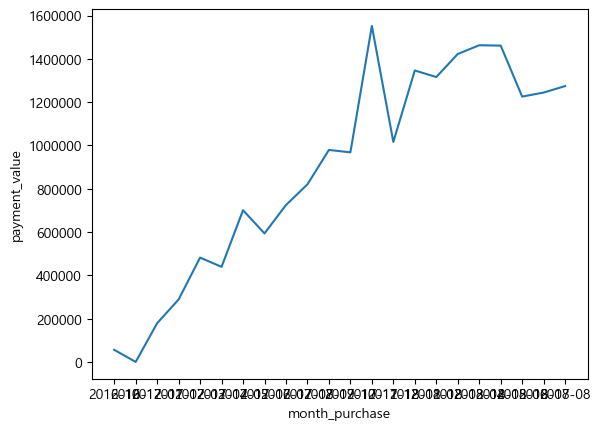

In [40]:
# sns.lineplot(data=day_sum,
#              x='month_purchase',
#              y='payment_value')

plt.ticklabel_format(style='plain')
sns.lineplot(data= day_sum, x=day_sum['month_purchase'].astype(str)
             ,y= day_sum['payment_value']
              )

In [41]:
retail_df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet,payment_installments_category,month_value
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1462818.59
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1346217.64
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1244353.23
3,143d00a4f2dde4e0364ee1821577adb3,619e926d09b26efbd5180368b1ddc874,delivered,2018-08-03 08:55:00,8/3/2018 9:31,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,1.0,credit_card,2.0,121.84,SP,baby,371.0,2704.0,2018-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1274242.28
4,86cafb8794cb99a9b1b77fc8e48fbbbb,ad353b4fb0e294adc4eda48af73e68a6,delivered,2018-04-11 01:06:00,4/11/2018 1:30,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,1.0,credit_card,4.0,46.19,SP,housewares,625.0,4420.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1462818.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116428,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1346217.64
116429,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1346217.64
116430,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,968221.77
116431,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,968221.77


<Axes: xlabel='product_volume', ylabel='payment_value'>

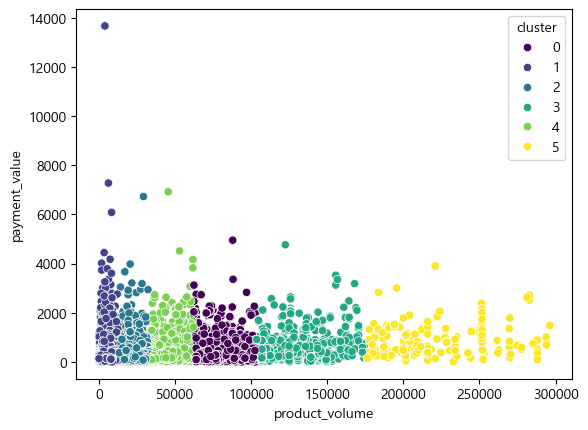

In [42]:
#continue 에 연속형 변수 넣고
# 인코딩 한 거 아직 ㄴㄴ
# month_value - 월별 매출.

continuous_col = ['price', 'shipping_charges', 
                  'payment_sequential', 'payment_installments', 
                  'payment_value', 'product_volume']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(retail_df_merged[continuous_col])
kmeans_test_df = retail_df_merged.copy()
kmeans_test_df['cluster'] = kmeans.labels_
sns.scatterplot(data=kmeans_test_df,
                x= 'product_volume',
                y='payment_value',
                hue='cluster',
                palette='viridis'
                )

<Axes: xlabel='product_volume', ylabel='payment_value'>

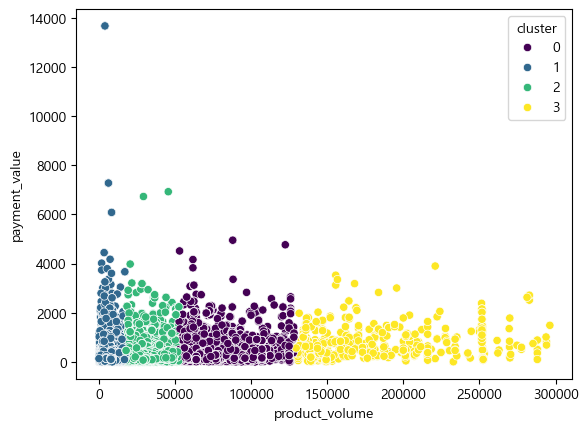

In [43]:
continuous_col = ['price', 'shipping_charges', 
                  'payment_sequential', 'payment_installments', 
                  'payment_value', 'product_volume']
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(retail_df_merged[continuous_col])
kmeans_test_df = retail_df_merged.copy()
kmeans_test_df['cluster'] = kmeans.labels_
sns.scatterplot(data=kmeans_test_df,
                x= 'product_volume',
                y='payment_value',
                hue='cluster',
                palette='viridis')

In [44]:
# 엘보우 K-MEANS

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def elbow(X):
    sse = [] # 군집 내 거리의 합
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
# elbow(retail_df_merged)

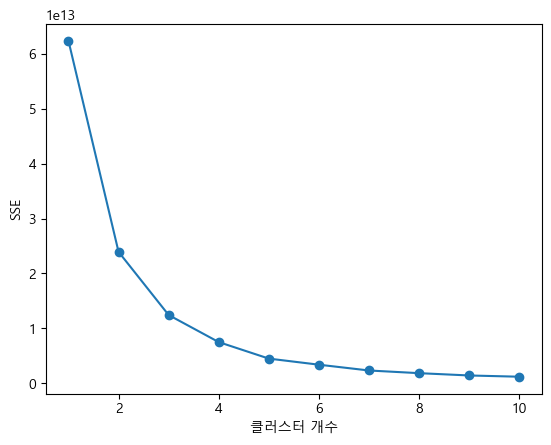

In [45]:
elbow(kmeans_test_df[continuous_col])
# 4개!!!

In [ ]:
# GMM + AIC/BIC
# AIC와 BIC 값이 가장 낮아지는 지점이 최적의 클러스터 수를 나타낸다
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
def gmm_elbow(X):
    aic = []
    bic = []
    for i in range(1, 11):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        bic.append(gmm.bic(X))
    plt.plot(range(1, 11), aic, marker='o', label='AIC')
    plt.plot(range(1, 11), bic, marker='o', label='BIC')
    plt.xlabel('클러스터 개수')
    plt.ylabel('정보 기준 (AIC/BIC)')
    plt.legend()
    plt.show()
gmm_elbow(X)

In [ ]:
# DBSCAN 모델 - 밀도기반이라 엘보우 포인트 계산 X
# DBSCAN 모델 생성 및 적용
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
# 결과 시각화
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()
#eps: 두 포인트가 같은 클러스터에 속하기 위해 필요한 최대 거리
#min_samples: 한 클러스터가 형성되기 위해 필요한 최소 포인트 수

In [46]:
# # PCA 수행
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2, random_state=42)  # 2개의 주성분으로 축소
# pca_result = pca.fit_transform()

# # 차원축소 기법 - pca 
# # 인코딩 진행 후(데이터 차원 많아진 후) pca 진행
# # 인코딩 한 거 지우고 pca한 거 merge

TypeError: PCA.fit_transform() missing 1 required positional argument: 'X'

In [ ]:
retail_df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,month_purchase,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MG,customer_state_PE,customer_state_PR,customer_state_RJ,customer_state_RS,customer_state_SC,customer_state_SP,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet,order_status_delivered,payment_installments_category,month_value
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1462818.59
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1346217.64
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,1244353.23
3,143d00a4f2dde4e0364ee1821577adb3,619e926d09b26efbd5180368b1ddc874,delivered,2018-08-03 08:55:00,8/3/2018 9:31,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,1.0,credit_card,2.0,121.84,SP,baby,371.0,2704.0,2018-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1274242.28
4,86cafb8794cb99a9b1b77fc8e48fbbbb,ad353b4fb0e294adc4eda48af73e68a6,delivered,2018-04-11 01:06:00,4/11/2018 1:30,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,1.0,credit_card,4.0,46.19,SP,housewares,625.0,4420.0,2018-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1462818.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116428,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1346217.64
116429,59e88b7d3675e89aceaf86f372d3bc9a,4d1bbadcfd9bdc738e54599627870319,delivered,2018-01-03 15:05:00,1/4/2018 5:14,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,29.90,16.11,1.0,wallet,1.0,92.02,MG,toys,700.0,8060.0,2018-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1346217.64
116430,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,968221.77
116431,420937423f0cb3d3fe689330b5d385a9,1fd97aeef909db302af3962152746e9e,delivered,2017-10-19 09:26:00,10/21/2017 2:49,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,39.71,16.11,1.0,wallet,1.0,111.64,RJ,toys,700.0,8060.0,2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,968221.77
